In [1]:
#import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

# Display preferences.
%matplotlib inline
pd.options.display.max_rows = 16
import warnings
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd")
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv',index_col=0)

# Applying log transformation to Newspaper

In [3]:
data.Newspaper = np.log(data.Newspaper)

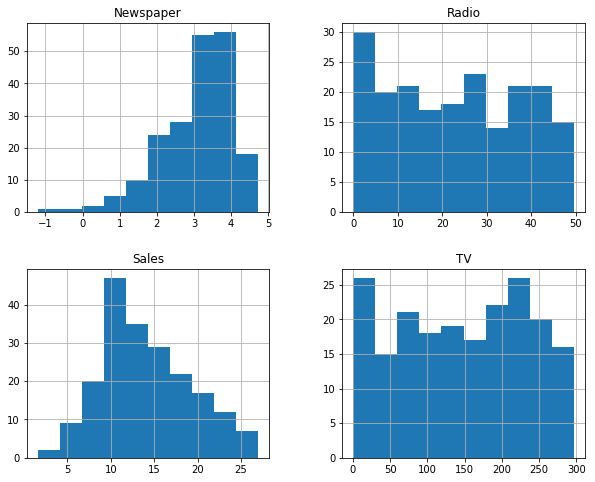

In [4]:
data.hist(figsize = (10,8))
plt.show()

# Creating features for when TV values are low:

In [5]:
data['lowTV'] = data.TV.apply(lambda x: 1 if (x < data.TV.quantile(0.25)) else 0)

In [6]:
data.head(n=3)

,TV,Radio,Newspaper,Sales,lowTV
1,230.1,37.8,4.237001,22.1,0
2,44.5,39.3,3.808882,10.4,1
3,17.2,45.9,4.238445,9.3,1


In [7]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper','lowTV']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.03922999  0.19026556  0.02535488 -1.69048515]]

Intercept: 
 [ 4.17231917]

R-squared:
0.905535940772


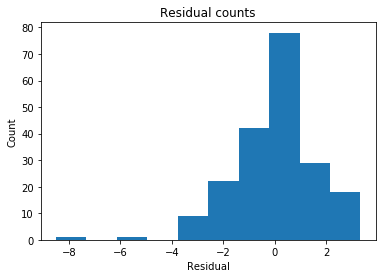

In [8]:
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

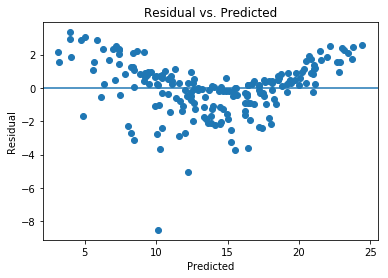

In [9]:
# Not a great precision...

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [10]:
print('average residual =', np.abs(residual).mean())

average residual = 1.1826332211029909


# Filtering outliers from Radio and TV:

In [11]:
data_quant = data.iloc[:,:4][(data.TV < data.TV.quantile(0.75)) & (data.TV > data.TV.quantile(0.25))]
data_quant = data_quant[(data_quant.Radio < data_quant.Radio.quantile(0.75)) & (data_quant.Radio > data_quant.Radio.quantile(0.25))]

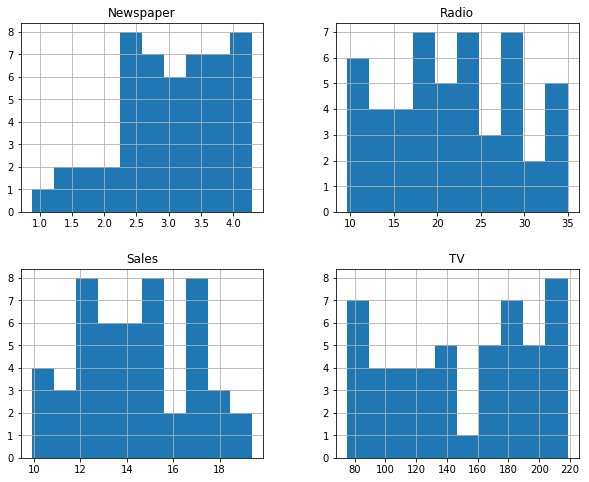

In [12]:
data_quant.hist(figsize = (10,8))
plt.show()

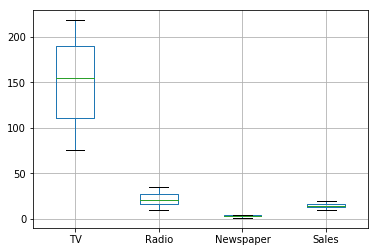

In [13]:
data_quant.boxplot()
plt.show()

In [14]:
data_quant.shape

(50, 4)

In [15]:
data_quant.iloc[:,:3].corr()

,TV,Radio,Newspaper
TV,1.000000,0.251585,0.081472
Radio,0.251585,1.000000,0.245562
Newspaper,0.081472,0.245562,1.000000


In [16]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data_quant['Sales'].values.reshape(-1, 1)
X = data_quant[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.03856767  0.16670488 -0.01461917]]

Intercept: 
 [ 4.97331115]

R-squared:
0.972046776541


#### R-squared is too close to zero...

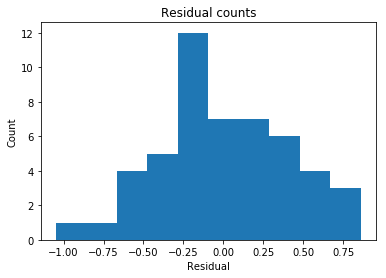

In [17]:
predicted = regr.predict(X).ravel()
actual = data_quant['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

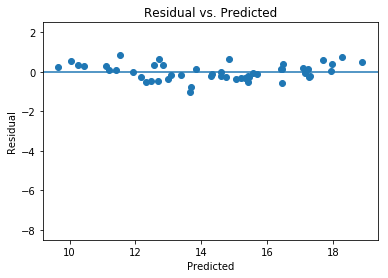

In [18]:
# Better, but not great precision...

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.ylim(-8.5, 2.5)
plt.title('Residual vs. Predicted')
plt.show()

In [19]:
print('average residual =', np.abs(residual).mean())

average residual = 0.3343363312433158
